In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [4]:
rf_model

RandomForestClassifier()

In [5]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7575757575757576

# Model Tuning

In [6]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" fo

In [14]:
rf_params = {"max_depth":[2,5,8,10],
             "max_features":[2,5,8],"n_estimators":[10,500,1000],
            "min_samples_split":[2,5,10]}

In [15]:
rf_model = RandomForestClassifier()

In [16]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv = 10,n_jobs = -1,verbose = 2)

In [17]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [24]:
print("Best Params:",rf_cv_model.best_params_)

Best Params: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 1000}


In [25]:
rf_tuned = RandomForestClassifier(max_depth = 8,max_features = 8,min_samples_split = 5,n_estimators = 1000)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=5,
                       n_estimators=1000)

In [26]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

In [27]:
Importance = pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

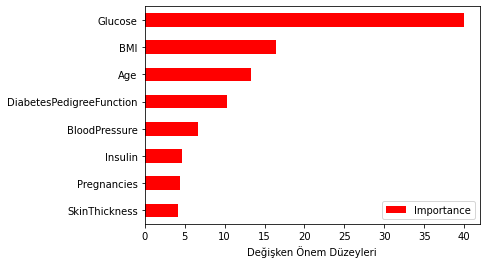

In [30]:
Importance.sort_values(by = "Importance",axis = 0,ascending = True).plot(kind = "barh",color = "r");
plt.xlabel("Değişken Önem Düzeyleri")